## Analyse Volumen
Vergleich und Analyse der Gebäudevolumen

In [1]:
import src.package.charts as charts
import src.package.importer as im
import src.package.consts as c
import seaborn as sns

# set size of seaborn plots
charts.set_preferences(sns)

df = im.get_extended_dataset('../package/datasets/full_dataset.csv')


#### Volumen RI SIA 116

In [2]:
df[c.FIELD_VOLUME_TOTAL_116].describe()

count       475.000000
mean      28468.892632
std       38813.180364
min         356.000000
25%        6437.000000
50%       16752.000000
75%       32965.000000
max      315370.000000
Name: volume_total_116, dtype: float64

#### Volumen GV SIA 416

In [3]:
df[c.FIELD_VOLUME_TOTAL_416].describe()

count       669.000000
mean      23990.756353
std       32883.672239
min         167.000000
25%        4540.000000
50%       12600.000000
75%       29393.000000
max      272000.000000
Name: volume_total_416, dtype: float64

### Vergleich
Abweichung **absolut**

In [4]:
volume_df = df.copy().loc[:, [c.FIELD_VOLUME_TOTAL_416, c.FIELD_VOLUME_TOTAL_116]]
volume_df = volume_df.dropna()
volume_df['diff_volume'] = volume_df.eval(f'{c.FIELD_VOLUME_TOTAL_416} - {c.FIELD_VOLUME_TOTAL_116}').abs()
volume_df['diff_volume'].describe()

count      201.000000
mean      2980.099502
std       4662.442863
min          0.000000
25%        375.000000
50%       1372.000000
75%       3252.000000
max      29248.000000
Name: diff_volume, dtype: float64

Abweichung in **Prozent**

In [5]:
volume_df['diff_volume_percent'] = (df[c.FIELD_VOLUME_TOTAL_116] - volume_df[c.FIELD_VOLUME_TOTAL_416]) / volume_df[c.FIELD_VOLUME_TOTAL_116] * 100
volume_df['diff_volume_percent'].describe()

count    201.000000
mean      13.004469
std        8.199621
min        0.000000
25%        8.073112
50%       11.029412
75%       16.473616
max       48.296122
Name: diff_volume_percent, dtype: float64

### Volumen und Ausgaben
Zeigt **Volumen** in relation zu den **Gesamtausgaben**.
(Weisen hohe Korrelation auf und könnten ggf. auch hohe Korrelation zu Geschossfläche aufweisen)

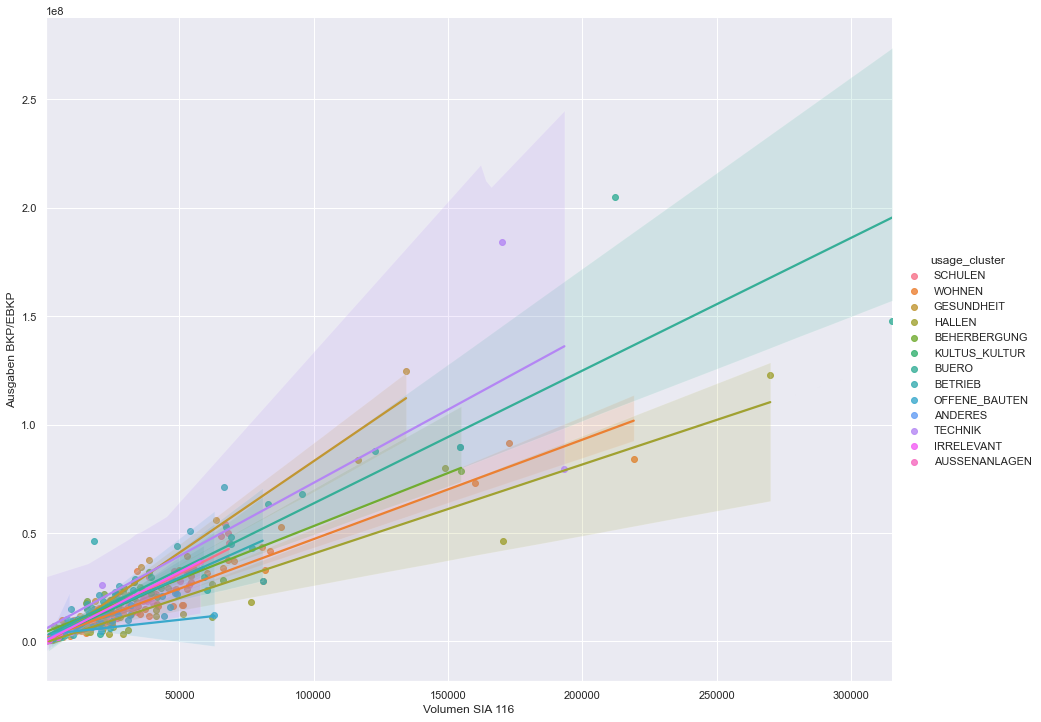

In [6]:
gf = sns.lmplot(
    data=df,
    x=c.FIELD_VOLUME_TOTAL_116, y=c.FIELD_TOTAL_EXPENSES,
    hue=c.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
)

gf.set(xlabel='Volumen SIA 116', ylabel='Ausgaben BKP/EBKP')